**Author, Group and Dataset Details:**

S.No. | Author | BITS ID | Group | Dataset | Contribution Percentage |
:-:|:-:|:-:|:-:|:-:|:-:|
1.|Vipin Indoria|2021FC04245|Group 046|PS9 Dry Beans| 100% |
2.|Anuroop Bisaria|2021FC04237|Group 046|PS9 Dry Beans| 100% |
3.| | | | | |

# Super Market Sales Analytics

# Background

This notebook demonstrates how you can analyze the data set, investigate, train a machine learning model, evaluate the result and predict the overall performance using classical machine learning approch based on the features obtained through transactions systems described in next few lines. 

The growth of supermarkets in most populated cities are increasing and market competitions are also high. The dataset is one of the historical sales of supermarket company which has recorded in 3 different branches for 3 months data. Predictive data analytics methods are easy to apply with this dataset.

# Notebook overview

This notebook consists of several parts. First, we import and configure the required libraries. After that we do Data Visualization and Exploration for data sanity check and exploratory data analysis. After that we prepare the data using Data Pre-processing and cleaning techniques and create the feature store. With the newly created features we create various classification models.

# Dataset

For this project we are using Super Market Sales Dataset, which has following properties:

__Format Type:__
CSV

__Attribute Information:__
+ 1.) Invoice id: Computer generated sales slip invoice identification number
+ 2.) Branch: Branch of supercenter (3 branches are available identified by A, B and C)
+ 3.) City: Location of supercenters
+ 4.) Customer type: Type of customers, recorded by Members for customers using member card and Normal for without member card
+ 5.) Gender: Gender type of customer
+ 6.) Product Type: General item categorization groups — Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel
+ 7.) Unit price: Price of each product in dollar
+ 8.) Quantity: Number of products purchased by customer
+ 9.) Tax: 5% tax fee for customer buying
+ 10.) Selling Price: Total price including tax
+ 11.) Date: Date of purchase (Record available from January 2019 to March 2019)
+ 12.) Time: Purchase time (10am to 9pm)
+ 13.) Payment Type: Payment used by customer for purchase (3 methods are available — Cash, Credit card and Ewallet)
+ 14.) Cost Price: Cost of goods sold
+ 15.) Gross income: Gross income
+ 16.) Rating: Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)

# 1. Setup

We need to install required libraries and import them.

In [1]:
import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import folium

import seaborn as sns

from wordcloud import WordCloud

'''from collections import Counter

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

from bioinfokit.visuz import cluster
'''

'from collections import Counter\n\nfrom sklearn.experimental import enable_iterative_imputer\nfrom sklearn.impute import IterativeImputer\nfrom sklearn.preprocessing import StandardScaler, LabelEncoder\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.decomposition import PCA\n\nfrom imblearn.over_sampling import SMOTE\nfrom imblearn.under_sampling import RandomUnderSampler\nfrom imblearn.pipeline import Pipeline\n\nfrom bioinfokit.visuz import cluster\n'

In [2]:
PROJECT_ROOT = os.path.dirname(os.path.dirname(os.path.abspath("SuperMarketSalesAnalytics.ipynb")))

Now, we will explore and visualize the data and the relationships between attributes.

# 2. Data Visualization and Exploration

Let's start by loading the dataset from our csv file into a Pandas dataframe

In [50]:
data = pd.read_csv(
    os.path.join(PROJECT_ROOT, "data", "Supermarket_Sales_Dataset-1.csv"),
    dtype = {"Invoice ID": "str",
             "Branch": "str",
             "City": "str",
             "Customer Type": "str",
             "Gender": "str",
             "Product Type": "str",
             "Unit Price": "float",
             "Quantity": "int",
             "Tax": "float",
             "Selling Price": "float",
             "Date": "str",
             "Time": "str",
             "Payment Type": "str",
             "Cost Price": "float",
             "Gross Income": "float",
             "Rating": "float"
            },
    parse_dates=['Date']
)

In [51]:
data.dtypes

Invoice ID               object
Branch                   object
City                     object
Customer Type            object
Gender                   object
Product Type             object
Unit Price              float64
Quantity                  int32
Tax                     float64
Selling Price           float64
Date             datetime64[ns]
Time                     object
Payment Type             object
Cost Price              float64
Gross Income            float64
Rating                  float64
dtype: object

In [52]:
data.head(10).style.background_gradient(cmap='GnBu')

,Invoice ID,Branch,City,Customer Type,Gender,Product Type,Unit Price,Quantity,Tax,Selling Price,Date,Time,Payment Type,Cost Price,Gross Income,Rating
0,750-67-8428,A,Bangalore,Member,Female,Health and beauty,74.690000,7,26.141500,548.971500,2019-01-05 00:00:00,13:08,Debit card,522.830000,26.141500,9.100000
1,226-31-3081,C,Mysore,Normal,Female,Electronic accessories,15.280000,5,3.820000,80.220000,2019-03-08 00:00:00,10:29,Cash,76.400000,3.820000,9.600000
2,631-41-3108,A,Bangalore,Normal,Male,Home and lifestyle,46.330000,7,16.215500,340.525500,2019-03-03 00:00:00,13:23,Credit card,324.310000,16.215500,7.400000
3,123-19-1176,A,Bangalore,Member,Male,Health and beauty,58.220000,8,23.288000,489.048000,2019-01-27 00:00:00,20:33,Debit card,465.760000,23.288000,8.400000
4,373-73-7910,A,Bangalore,Normal,Male,Sports and travel,86.310000,7,30.208500,634.378500,2019-02-08 00:00:00,10:37,Debit card,604.170000,30.208500,5.300000
5,699-14-3026,C,Mysore,Normal,Male,Electronic accessories,85.390000,7,29.886500,627.616500,2019-03-25 00:00:00,18:30,Debit card,597.730000,29.886500,4.100000
6,355-53-5943,A,Bangalore,Member,Female,Electronic accessories,68.840000,6,20.652000,433.692000,2019-02-25 00:00:00,14:36,Debit card,413.040000,20.652000,5.800000
7,315-22-5665,C,Mysore,Normal,Female,Home and lifestyle,73.560000,10,36.780000,772.380000,2019-02-24 00:00:00,11:38,Debit card,735.600000,36.780000,8.000000
8,665-32-9167,A,Bangalore,Member,Female,Health and beauty,36.260000,2,3.626000,76.146000,2019-01-10 00:00:00,17:15,Credit card,72.520000,3.626000,7.200000
9,692-92-5582,B,Mangalore,Member,Female,Food and beverages,54.840000,3,8.226000,172.746000,2019-02-20 00:00:00,13:27,Credit card,164.520000,8.226000,5.900000


**Key Observations:**

* The first field is the 'Invoice ID' attribute that we will want to drop before batch inference and add to the final inference output next to the probability of classification.
* Last field, 'Rating', is an indicator of the actual experience of customers shooping in Super Market.
* There are 14 other numeric/categorical features that we will use for training and inferencing.
* Need to replace the Categorical values with a numeric label values.

The first step is to use a histogram to see how the values of individual attributes are distributed, as well as compute summary statistics for numeric attributes such as mean, min values, max values, standard deviations, etc.

For categorical variables we need to see frequency tables.

While there are several ways to do this in Python - we are going to use the following pandas functions:hist(),describe(),crosstab(), andselect_dtypes().

To show the histograms right in the Jupyter notebook, we will also use the %matplotlib inline magic function of IPython.

col_0,% observations
Branch,
A,0.340
B,0.332
C,0.328


# of unique values 3


col_0,% observations
City,
Bangalore,0.340
Mangalore,0.332
Mysore,0.328


# of unique values 3


col_0,% observations
Customer Type,
Member,0.501
Normal,0.499


# of unique values 2


col_0,% observations
Gender,
Female,0.501
Male,0.499


# of unique values 2


col_0,% observations
Product Type,
Electronic accessories,0.170
Fashion accessories,0.178
Food and beverages,0.174
Health and beauty,0.152
Home and lifestyle,0.160
Sports and travel,0.166


# of unique values 6


col_0,% observations
Payment Type,
Cash,0.344
Credit card,0.311
Debit card,0.345


# of unique values 3


,Unit Price,Quantity,Tax,Selling Price,Cost Price,Gross Income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,49.650000,10.00000


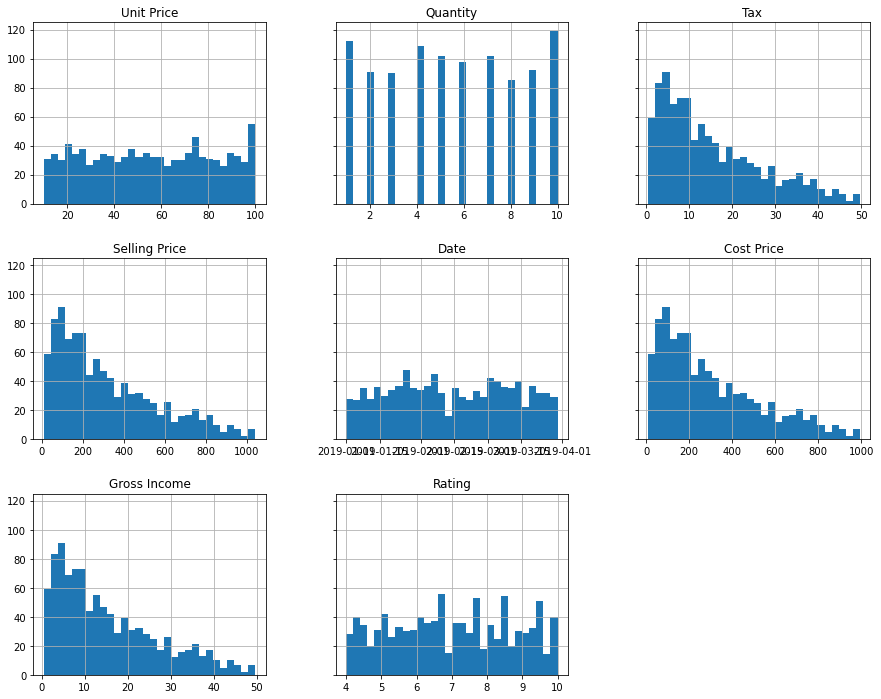

In [53]:
# show frequency tables for each categorical feature and counts of unique values
for column in data.select_dtypes(include=['object']).columns:
    if column not in ['Invoice ID', 'Date', 'Time']:
        display(pd.crosstab(index=data[column],
                            columns='% observations', 
                            normalize='columns'))
        print("# of unique values {}".format(data[column].nunique()))

# show summary statistics
display(data.describe())

# build histograms for each numeric feature
hist = data.hist(bins=30, sharey=True, figsize=(15, 12))

We can see immediately that:
* Most of the numeric features are having skewed distribution.


Now that we've seen the distribution of Super Market Sales's attributes, it's time to look at each feature using `Uni-variate Analysis` and these relate to others using `Bi-variate Analysis`

In [54]:
# Plot the Superstore location on map for geographical insights
cities = pd.DataFrame({'city': ['Bangalore', 'Mangalore', 'Mysore'],
                       'Latitude': [12.9716, 12.9141, 12.2958],
                       'Longitude' : [77.5946, 74.8560, 76.6394]})

market_map = folium.Map(location = [12.9716, 77.5946], zoom_start = 7, tiles = 'CartoDB Positron', control_scale = True)

plt.figure(figsize=(800,600));

for (i, j) in cities.iterrows():
    folium.Marker(location = [j.loc['Latitude'], j.loc['Longitude']], popup = j.loc['city'],tooltip = 'click', 
                  icon = folium.Icon(icon = 'glyphicon-shopping-cart', prefix = 'glyphicon')).add_to(market_map)
market_map

<Figure size 57600x43200 with 0 Axes>

Based on the location `Branch B` store is located on coastal area city `Mangalore`, `Branch A` store in major IT city `Bangalore` and `Branch C` store in major tourist city `Mysure` hence the purchasing behaviour of customers might be different based on geographical insights.

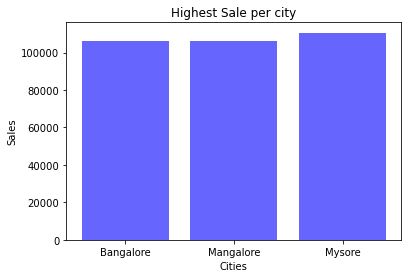

In [55]:
# Total sales in all 3 branches
sale=data.groupby('City').sum()['Selling Price'] #Y-values
cities=[city for city, data in data.groupby('City')] #X-values

# Plot
plt.bar(cities,sale,color='blue',alpha=.6)
plt.xlabel('Cities')
plt.ylabel('Sales')
plt.title('Highest Sale per city')
plt.show()

There is no much of a difference in sales across all the branches Bangalore(A), Mangalore(B) and Mysure(C). But, the sales in Branch C - Mysure is a bit higher than the rest of the branches.

In [56]:
# Convert date columns into date time 
data.Date = pd.to_datetime(data.Date)

#Add a month,day and weekday columns
data['month']=data.Date.dt.month
data['day']=data.Date.dt.day
data['weekday']=data.Date.dt.day_name()

#Add a hour and minute columns 
data['hour']=data.Time.str[0:2]
data['minute']=data.Time.str[3:5]

#Make it int values
data['hour']=pd.to_numeric(data['hour'])
data['minute']=pd.to_numeric(data['minute'])

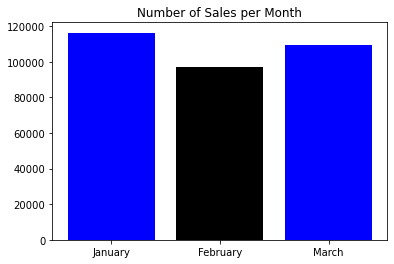

In [57]:
# Month wise total sales
sale=data.groupby('month').sum()['Selling Price']
month=['January','February','March']
c=['b','k','b']

#Plot
plt.figure(figsize=(6,4))
plt.bar(month,sale,color=c)
plt.title('Number of Sales per Month')
plt.show()

The supermarket performs well in January. It has a decrease in transactions in February and bounces back in March.

C:\Users\vipin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


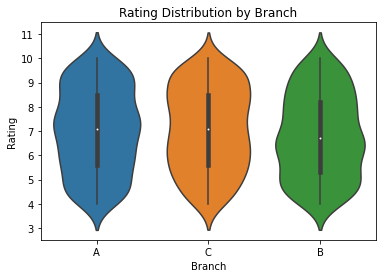

In [58]:
plt.title('Rating Distribution by Branch')
sns.violinplot('Branch','Rating',data=data);

- Branch A has received the most positive rating due to the tapered shape toward the middle between the values 6 to 9.
- Branch B has the most negative rating due to the tapered shape between the values 4 to 6.
- Branch C has almost equal positive and negative ratings between the value 4 to 6 and 8 to 10

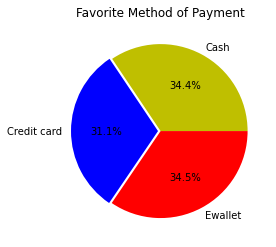

In [59]:
# Parameters for plotting
method=data.groupby('Payment Type').count()['Selling Price']
payment=['Cash','Credit card','Ewallet']
c=['y','b','r']

# Plot 
plt.pie(method,colors=c,labels=payment,explode=[0,0.03,0],autopct='%1.1f%%')
plt.title('Favorite Method of Payment')
plt.show()

The most popular payment method is in-fact E-wallet and not credit cards. Cash payment is also popular.

<AxesSubplot:title={'center':'Customer Transaction per Hour'}, xlabel='hour', ylabel='Selling Price'>

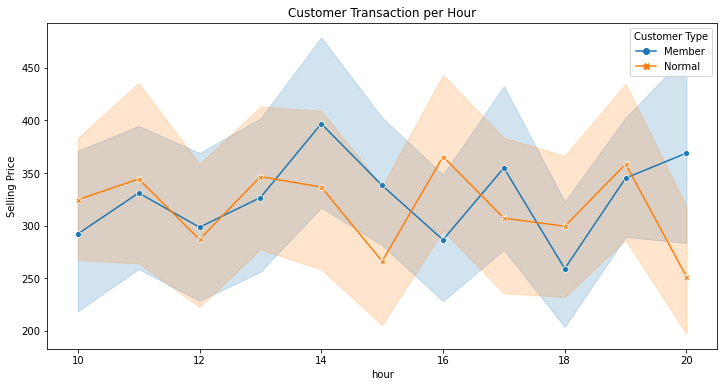

In [60]:
plt.figure(figsize=(12,6))
plt.title('Customer Transaction per Hour')
sns.lineplot(data=data,x='hour',y='Selling Price',hue='Customer Type',markers=True,style='Customer Type',dashes=False)

The Normal customers and the members like to shop around noon but members have the highest number of transactions at 2 pm.
Around 4 pm and 9 pm, the normal customers shop the most.

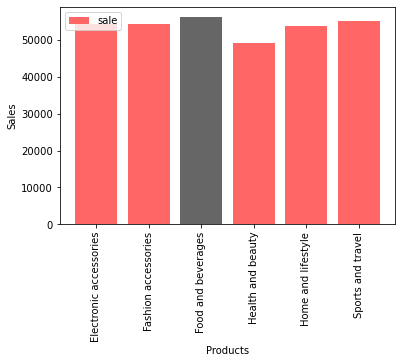

In [61]:
#Parameters
sale_product=data.groupby('Product Type').sum()['Selling Price']
products =[product for product, data in data.groupby('Product Type')]
c=['r','r','k','r','r','r']
#Plot the graph

plt.bar(products,sale_product,alpha=0.6,color=c)
plt.xticks(products, rotation='vertical')
plt.xlabel('Products')
plt.ylabel('Sales')
plt.legend(['sale'],loc='upper left')
plt.show()

Food and beverages has the hishest sales.

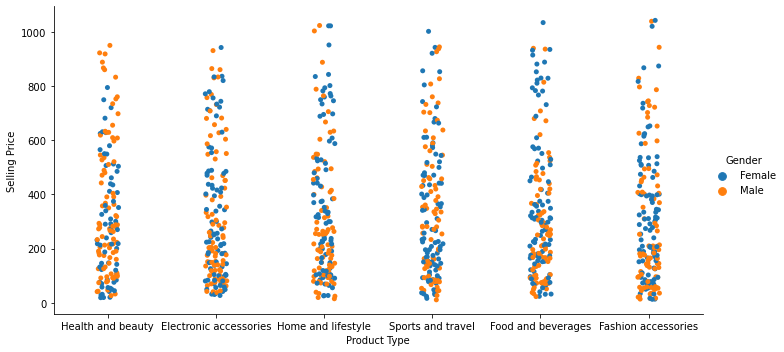

In [62]:
# Visualizing a Gender based comparison related to Product Type
sns.catplot(x='Product Type', y='Selling Price', hue='Gender',data=data,aspect=2)
plt.xlabel('Product Type')
plt.ylabel('Selling Price')
plt.show()

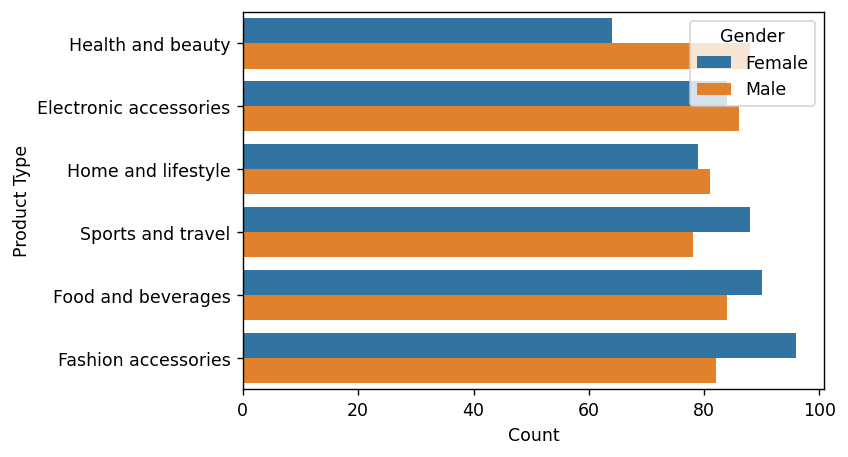

In [63]:
plt.figure(dpi=125)
sns.countplot(y ='Product Type', hue = "Gender", data = data) 
plt.xlabel('Count')
plt.ylabel('Product Type')
plt.show()

Well, In Health & Beauty, Males are much more than Females whereas in Fashion accessories , Food & beverages and Sports & Travel Females are more and in the rest there is not much significant difference.

In [64]:
# Visualizing a City based comparison related to Product Type

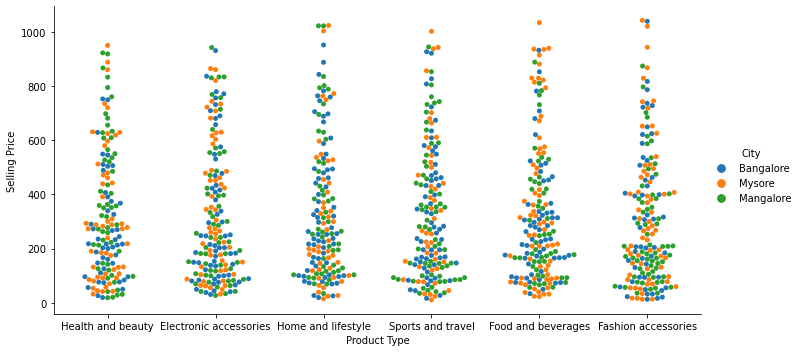

In [65]:
sns.catplot(x='Product Type',y='Selling Price',hue='City',kind='swarm',data=data,aspect=2)
plt.xlabel('Product Type')
plt.ylabel('Selling Price')
plt.show()

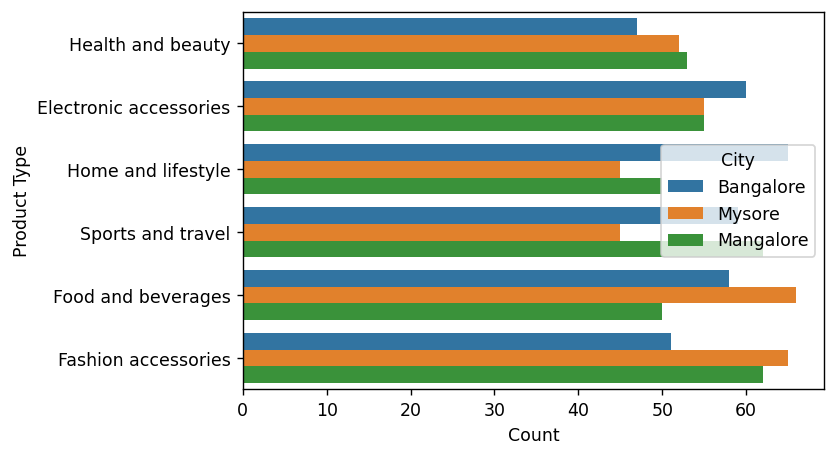

In [66]:
plt.figure(dpi=125)
sns.countplot(y ='Product Type', hue = "City", data = data) 
plt.xlabel('Count')
plt.ylabel('Product Type')
plt.show()

Well, Bangalore being a major IT hub leads at Home & Lifestyle and Electronic accessories. Mysore being a tourist city leads at Food & Bevaerages and Fashion accessories. Mangalore being a coastal city leads at Sports & Travel and Health & Beauty.

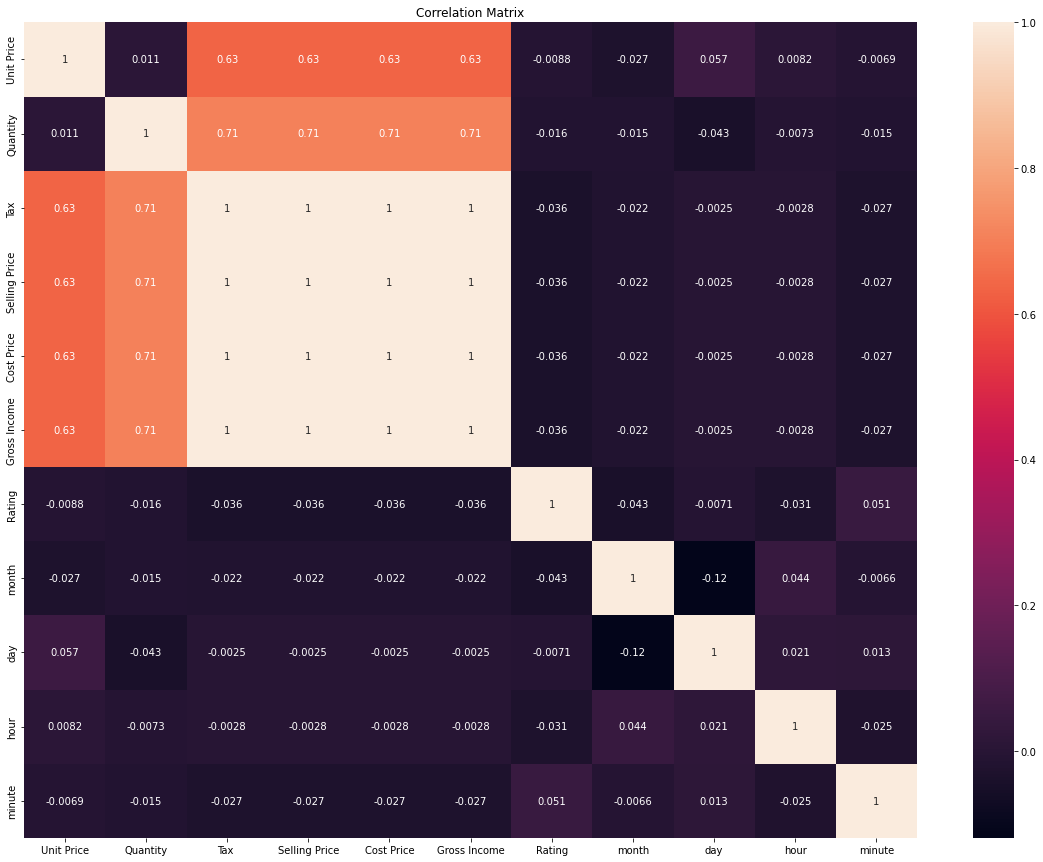

In [67]:
#Create a correlation matrix
corr_df=data.corr()

plt.figure(figsize=(20,15))
plt.title('Correlation Matrix')
sns.heatmap(corr_df,annot=True)
plt.show()

The best correlated are Tax 5%, Total, Gross Income and cogs i.e Cost of Goods sold with a correlation of 1.
Also, the above mentioned all has a good correlation of 0.71 with Quantity.

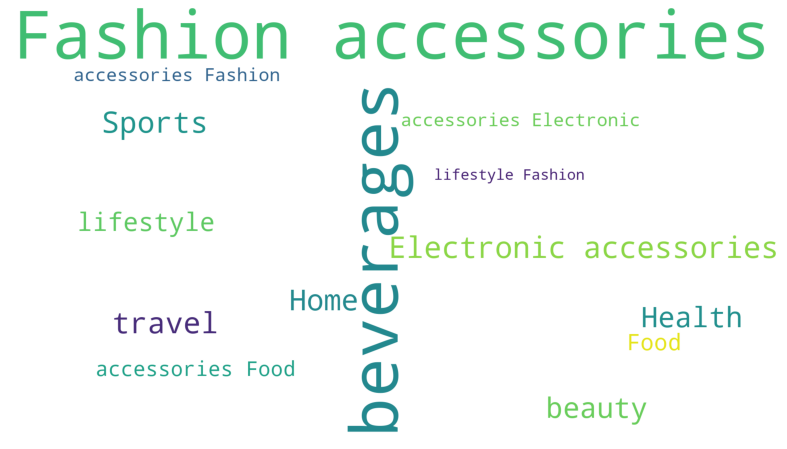

In [68]:
# Word cloud of product type (Occurance plot)
plt.subplots(figsize=(20,8))
wordcloud = WordCloud(background_color='White',width=1920,height=1080).generate(" ".join(data['Product Type']))
plt.imshow(wordcloud)
plt.axis('off')
#plt.savefig('cast.png')
plt.show()

# 3. Data pre-processing and cleaning

In a dataset, we often see the presence of empty cells, rows, and columns, also referred to as Missing values. They make the dataset inconsistent and unable to work on. Many machine learning algorithms return an error if parsed with a dataset containing null values. Detecting and treating missing values is essential while analyzing and formulating data for any purpose.

There are several ways to detect missing values in Python. isnull() function is widely used for the same purpose.

In [69]:
#returns sum of null values per column
print("Column wise number of missing values count:")
print(data.isnull().sum())

#return sum of all null values in dataset
print(f"\nTotal missing values in dataset: {data.isnull().sum().sum()}")


Column wise number of missing values count:
Invoice ID       0
Branch           0
City             0
Customer Type    0
Gender           0
Product Type     0
Unit Price       0
Quantity         0
Tax              0
Selling Price    0
Date             0
Time             0
Payment Type     0
Cost Price       0
Gross Income     0
Rating           0
month            0
day              0
weekday          0
hour             0
minute           0
dtype: int64

Total missing values in dataset: 0


After acknowledging, that there are no null/missing values in our dataset, we can go deeper with our analysis.

In [70]:
# Filter out the Grass Income as its same as Tax column having 1 correlation
data.drop('Gross Income', axis=1, inplace=True)

In [71]:
# Filter out Branch Column as it has same values as City
data.drop('Branch', axis=1, inplace=True)

In [73]:
# Create a new field called “Timeslot” was created to have the timeslot (morning, afternoon, evening, and night) for
# generating better insights from the dataset.
def categorise_timeslot(row):
    t = row['hour'] + 0.01 * row['minute']
    if t >= 10.00 and t <= 11.59:
        return 'Morning'
    elif t >= 12.00 and t <= 17.00:
        return 'Afternoon'
    elif t >= 17.01  and t <= 19.00:
        return 'Evening'
    return 'Night'
data['Timeslot'] = data.apply(lambda row: categorise_timeslot(row), axis=1)

In [75]:
# discretization on rating column
data['Discret Rating'] = data.apply(lambda row: round(row['Rating']), axis=1)

In [80]:
# Filter out the redundant columns
data.drop(['Date', 'Time', 'hour', 'minute', 'Rating'], axis=1, inplace=True)

In [82]:
# Split the Invoice ID column which is unique identifier from rest of the attributes and later to be merged
invoice_id = data[['Invoice ID']]

In [85]:
data.drop('Invoice ID', axis=1, inplace=True)

In [87]:
# Apply one hot encoding technique to convert categorical columns into numerical
ohe_data = pd.get_dummies(data, prefix=['City', 'Customer_Type', 'Gender', 'Product_Type', 'Payment_Type', 'Weekday', 'Timeslot'])

In [89]:
ohe_data.head(10).style.background_gradient(cmap='GnBu')

,Unit Price,Quantity,Tax,Selling Price,Cost Price,month,day,Discret Rating,City_Bangalore,City_Mangalore,City_Mysore,Customer_Type_Member,Customer_Type_Normal,Gender_Female,Gender_Male,Product_Type_Electronic accessories,Product_Type_Fashion accessories,Product_Type_Food and beverages,Product_Type_Health and beauty,Product_Type_Home and lifestyle,Product_Type_Sports and travel,Payment_Type_Cash,Payment_Type_Credit card,Payment_Type_Debit card,Weekday_Friday,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday,Timeslot_Afternoon,Timeslot_Evening,Timeslot_Morning,Timeslot_Night
0,74.690000,7,26.141500,548.971500,522.830000,1,5,9,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0
1,15.280000,5,3.820000,80.220000,76.400000,3,8,10,0,0,1,0,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0
2,46.330000,7,16.215500,340.525500,324.310000,3,3,7,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
3,58.220000,8,23.288000,489.048000,465.760000,1,27,8,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1
4,86.310000,7,30.208500,634.378500,604.170000,2,8,5,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0
5,85.390000,7,29.886500,627.616500,597.730000,3,25,4,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0
6,68.840000,6,20.652000,433.692000,413.040000,2,25,6,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0
7,73.560000,10,36.780000,772.380000,735.600000,2,24,8,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
8,36.260000,2,3.626000,76.146000,72.520000,1,10,7,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0
9,54.840000,3,8.226000,172.746000,164.520000,2,20,6,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0


In [92]:
# Normalize the Unit Price, Quantity, Tax, Selling Price, Cost Price Column by applying Z-Score Normalization
for column in ['Unit Price', 'Quantity', 'Tax ', 'Selling Price', 'Cost Price']:
    ohe_data[column] = (ohe_data[column] - ohe_data[column].mean()) / ohe_data[column].std()

In [93]:
ohe_data.head(10).style.background_gradient(cmap='GnBu')

,Unit Price,Quantity,Tax,Selling Price,Cost Price,month,day,Discret Rating,City_Bangalore,City_Mangalore,City_Mysore,Customer_Type_Member,Customer_Type_Normal,Gender_Female,Gender_Male,Product_Type_Electronic accessories,Product_Type_Fashion accessories,Product_Type_Food and beverages,Product_Type_Health and beauty,Product_Type_Home and lifestyle,Product_Type_Sports and travel,Payment_Type_Cash,Payment_Type_Credit card,Payment_Type_Debit card,Weekday_Friday,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday,Timeslot_Afternoon,Timeslot_Evening,Timeslot_Morning,Timeslot_Night
0,0.717801,0.509675,0.919147,0.919147,0.919147,1,5,9,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0
1,-1.524540,-0.174453,-0.987236,-0.987236,-0.987236,3,8,10,0,0,1,0,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0
2,-0.352605,0.509675,0.071410,0.071410,0.071410,3,3,7,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
3,0.096166,0.851739,0.675442,0.675442,0.675442,1,27,8,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1
4,1.156380,0.509675,1.266492,1.266492,1.266492,2,8,5,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0
5,1.121656,0.509675,1.238991,1.238991,1.238991,3,25,4,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0
6,0.497001,0.167611,0.450313,0.450313,0.450313,2,25,6,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0
7,0.675151,1.535867,1.827735,1.827735,1.827735,2,24,8,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
8,-0.732682,-1.200644,-1.003804,-1.003804,-1.003804,1,10,7,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0
9,-0.031407,-0.858580,-0.610938,-0.610938,-0.610938,2,20,6,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0


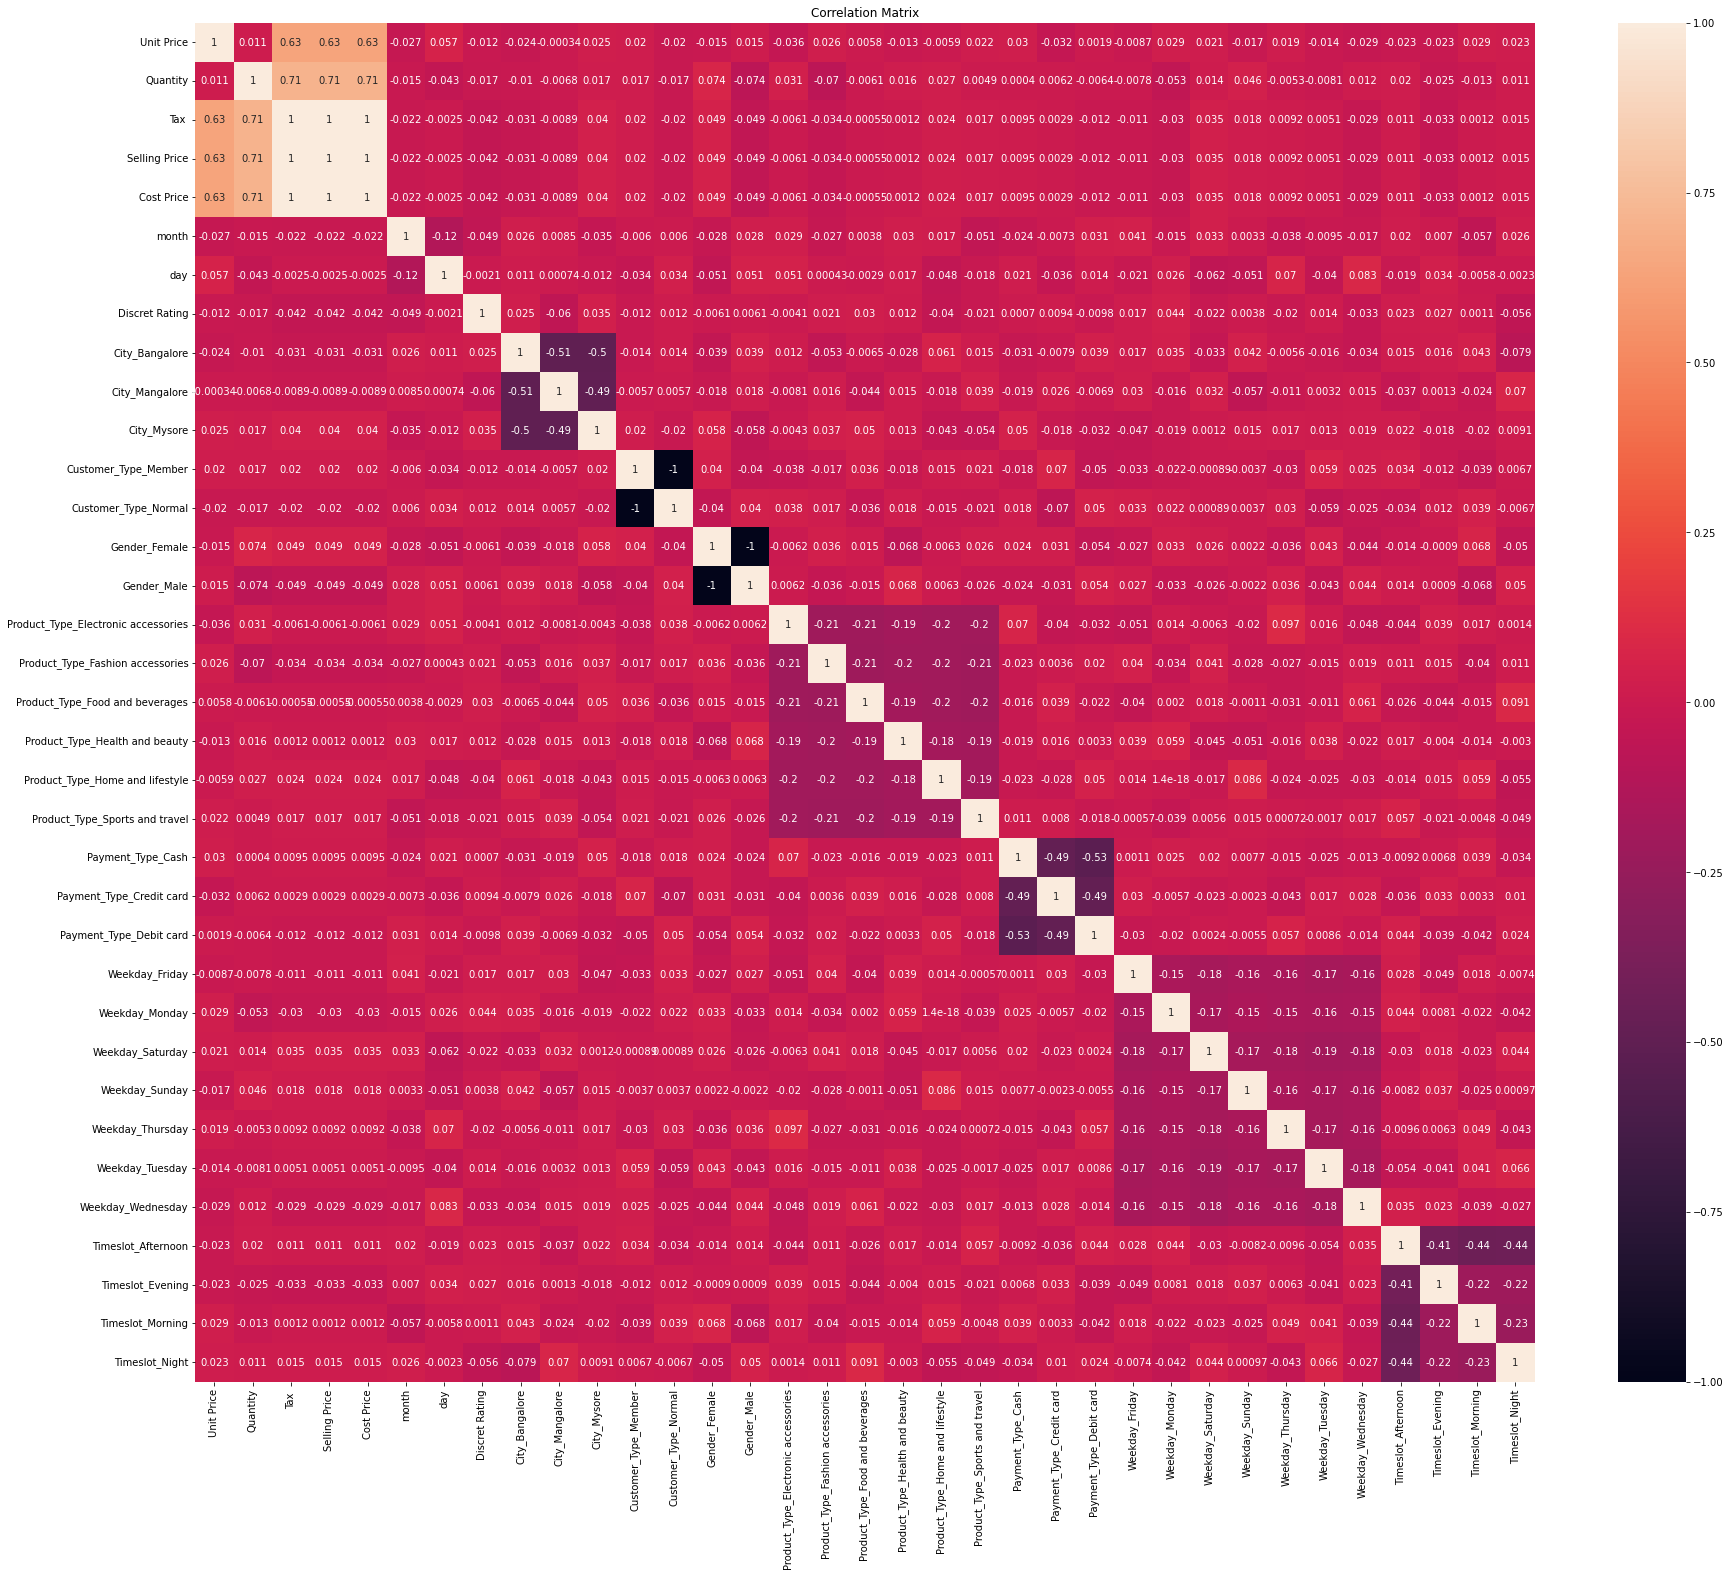

In [95]:
#Create a correlation matrix
corr_df_1=ohe_data.corr()

plt.figure(figsize=(30,25))
plt.title('Correlation Matrix')
sns.heatmap(corr_df_1,annot=True)
plt.show()

Based on correlation analysis done previously the final selected features are being selected.

In [17]:
# Feature Selection
imputed_feature_data = imputed_feature_data.drop(["Area", "Perimeter", 
                  "Eccentricity", "ConvexArea", 
                  "EquivDiameter", "Compactness", 
                  "ShapeFactor1", "ShapeFactor3"], axis=1)

In [18]:
imputed_feature_data.head(2)

,MajorAxisLength,MinorAxisLength,AspectRation,Extent,Solidity,roundness,ShapeFactor2,ShapeFactor4
Bean ID,,,,,,,,
1,208.178117,173.888747,1.197191,0.763923,0.988856,0.958027,0.003147,0.998724
2,200.524796,182.734419,1.097356,0.783968,0.984986,0.887034,0.003564,0.998430


Finally we don't have any more missing values and moving to the one of the most important steps as part of data preprocessing is detecting and treating the outliers as they can negatively affect the statistical analysis and the training process of a machine learning algorithm resulting in lower accuracy.

Detection of outliers isn’t a trivial problem. We’re trying to identify observations that don’t fit into the general characteristics of the dataset.

Here we will be using Quartile Analysis which mathematically define outlier candidates based on a feature’s statistical properties.

In [19]:
# Detect  outliers in the dataset
def get_outliers_percentage(data_matrix):
    outliers_dict = {}

    for c in data_matrix.columns:
        Q1 = np.percentile(imputed_feature_data[c], 25)
        Q3 = np.percentile(imputed_feature_data[c], 75)
        IQR = Q3 - Q1
        outlier_step = IQR * 1.5
        outliers_idx = imputed_feature_data[(imputed_feature_data[c] < Q1 - outlier_step) | (imputed_feature_data[c] > Q3 + outlier_step)].index
        outliers_dict[c] = outliers_idx
    return outliers_dict

print("% of outliers in each column of all the observations: ")
outliers = get_outliers_percentage(imputed_feature_data)
for k, v in outliers.items():
    print(f"{k}: {len(v) / len(imputed_feature_data):.4f}")

% of outliers in each column of all the observations: 
MajorAxisLength: 0.0278
MinorAxisLength: 0.0418
AspectRation: 0.0348
Extent: 0.0202
Solidity: 0.0572
roundness: 0.0067
ShapeFactor2: 0.0000
ShapeFactor4: 0.0564


In order to treat the outliers in each column we will use `Quantile based flooring and capping` technique in which the outlier is capped at a certain value above the `93rd percentile` value or floored at a factor below the `7th percentile` value.

In [20]:
# Replace the outliers with 7th or 93rd percentile value

for col, idxs in outliers.items():
    if len(idxs) > 0:
        # 7th quantile
        p_7 = imputed_feature_data[col].quantile(0.07)
         # 93rd quantile
        p_93 = imputed_feature_data[col].quantile(0.93)
        imputed_feature_data[col].clip(p_7, p_93, inplace=True)

In [21]:
# Validate the handling of outliers
print("% of outliers in each column of all the observations: ")
outliers = get_outliers_percentage(imputed_feature_data)
for k, v in outliers.items():
    print(f"{k}: {len(v) / len(imputed_feature_data):.4f}")

% of outliers in each column of all the observations: 
MajorAxisLength: 0.0000
MinorAxisLength: 0.0000
AspectRation: 0.0000
Extent: 0.0000
Solidity: 0.0000
roundness: 0.0000
ShapeFactor2: 0.0000
ShapeFactor4: 0.0000


**Feature Scaling:** Some machine learning algorithms are sensitive to feature scaling while others are virtually invariant to it. Since most of our features follows gaussian like distribution so we will be using Standardization technique but its subjective choise between normalization and standardiation. We are not considering normalization as we won't be using KNN or Neural Network algorithms which does not assume the distribution of data.

**Dimensionality Reduction:** Feature selection (FS) is a process which attempts to select more informative features. In some cases, too many redundant or irrelevant features may overpower main features for classification. Feature selection can remedy this problem and therefore improve the prediction accuracy and reduce the computational overhead of classification algorithms. The main aim of feature selection is to determine a minimal feature subset from a problem domain while retaining a suitably high accuracy in representing the original features.

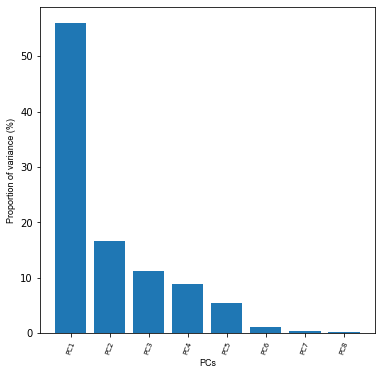

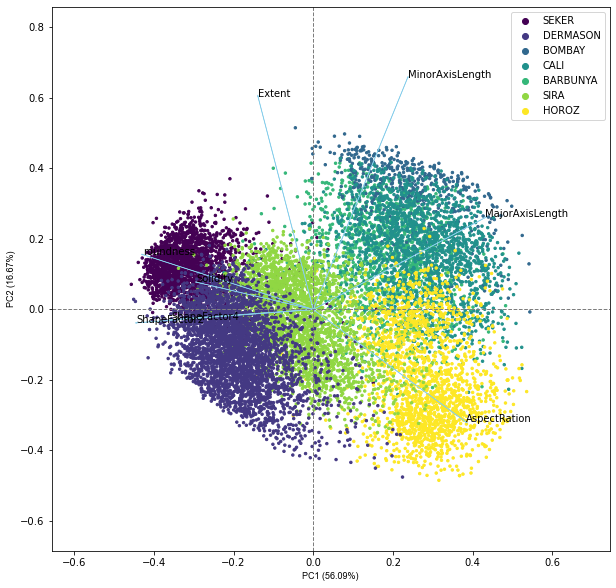

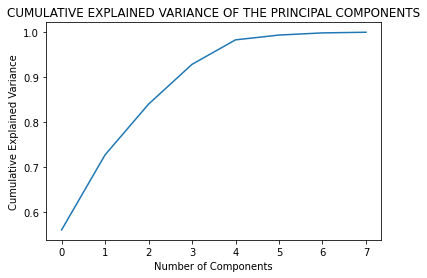

<AxesSubplot:>

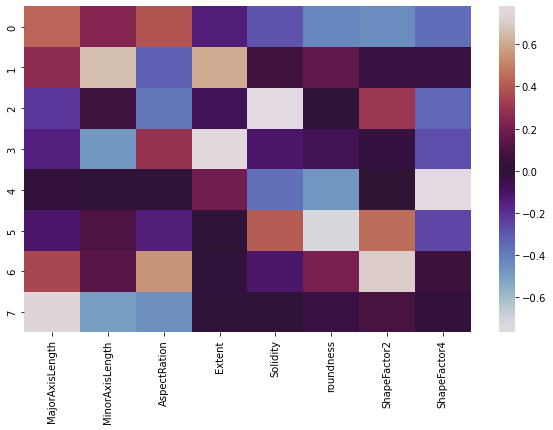

In [22]:
normalizer = StandardScaler()
scaled_features = normalizer.fit_transform(imputed_feature_data)
pca = PCA()
pca.fit(scaled_features)
loadings = pca.components_
num_pc = pca.n_features_
pc_list = ["PC" + str(i) for i in list(range(1, num_pc + 1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = imputed_feature_data.columns.values
loadings_df = loadings_df.set_index('variable')

# Screeplot of Principal Components
cluster.screeplot(obj=[pc_list, pca.explained_variance_ratio_], dim=(6, 6), show=True)

# 2D Bi-plot of Principal Components
pca_scores = PCA().fit_transform(scaled_features)
cluster.biplot(cscore=pca_scores, loadings=loadings, labels=imputed_feature_data.columns.values, 
               var1=round(pca.explained_variance_ratio_[0]*100, 2),
               var2=round(pca.explained_variance_ratio_[1]*100, 2),
               dim=(10, 10),
               colorlist=data["Class"], show=True)


# Cumulative Explained Variance Plot
plt.plot(np.cumsum(pca.explained_variance_ratio_)); 
plt.title('CUMULATIVE EXPLAINED VARIANCE OF THE PRINCIPAL COMPONENTS')
plt.xlabel('Number of Components'); 
plt.ylabel('Cumulative Explained Variance')
plt.show()

#Effect of variables on each components 
map_data= pd.DataFrame(pca.components_, columns=imputed_feature_data.columns.values)
plt.figure(figsize=(10,6))
sns.heatmap(map_data,cmap='twilight')

After performing the PCA, we can see in plots that how each components affect the variables. We see the first two principle components already cover more than 80% of the variation.

Since we only need a few principle components, we will have a look their effect on each variable. PC3 & PC4 only affects few variables to increase the overall cumulative variance described.

This heatmap and the color bar basically represent the correlation between the various feature and the principal component itself. Since we only need a few principle components, we will have a look their effect on each variable. PC3 & PC4 only affects few variables to increase the overall cumulative variance described. It is safer to select 3 principal components which covers more than 90% variability of data.

In [23]:
def get_train_test_data(features, target, test_size=0.3):
    return train_test_split(features, target, test_size=test_size, random_state=14, shuffle=True)

In [24]:
# Normalize the input features of the dataset
def scale_features(features, normalizer_model=None, is_fitted=False):
    if not is_fitted:
        normalizer = StandardScaler()
        return normalizer.fit_transform(features), normalizer
    else:
        return normalizer_model.fit_transform(features)

In [25]:
def pca_reduced_features(features, num_component, pca_model=None, is_fitted=False):
    if not is_fitted:
        pca = PCA(n_components=num_component)
        pca.fit(features)
        return pca.fit_transform(features), pca
    else:
        return pca_model.fit_transform(features)

From the data visualization & exploration section, we have concluded that there is some class imbalance in our dataset as there is high dispersion between `BOMBAY` and `DERMASON` class. Hence, the challenge of working with imbalanced datasets is that most machine learning techniques will ignore, and in turn have poor performance on, the minority class.

One approach to addressing imbalanced datasets is to oversample the minority class. The simplest approach involves duplicating examples in the minority class, although these examples don’t add any new information to the model. Instead, new examples can be synthesized from the existing examples. This is a type of data augmentation for the minority class and is referred to as the Synthetic Minority Oversampling Technique, or SMOTE for short.

In [26]:
def apply_smote(features, labels):
    sm = SMOTE(random_state=12)
    sm_features, sm_labels = sm.fit_resample(features, labels)
    return sm_features, sm_labels

# 4. Model Building

The train-test split is a technique for evaluating the performance of a machine learning algorithm. The procedure involves taking a dataset and dividing it into two subsets. The first subset is used to fit the model and is referred to as the training dataset. The second subset is not used to train the model; instead, the input element of the dataset is provided to the model, then predictions are made and compared to the expected values. This second dataset is referred to as the test dataset.

As suggested in assignment instruction, train-test split will be:  
    Case 1: Train= 80%, Test= 20%; (x_train_1, y_train_1)= 80%; (x_test_1, y_test_1)= 20%  
    Case 1: Train= 10%, Test= 90%; (x_train_1, y_train_1)= 10%; (x_test_1, y_test_1)= 90%  

In [50]:
from sklearn.model_selection import KFold,cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn import model_selection
from sklearn.utils import class_weight
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

## Case-1:

In [28]:
# Get train test dataset split
x_train_1, x_test_1, y_train_1, y_test_1 = get_train_test_data(imputed_feature_data, target, 0.2)

In [29]:
# Feature scaling
x_train_1, normalizer_model = scale_features(x_train_1)
x_test_1 = scale_features(x_test_1, normalizer_model=normalizer_model, is_fitted=True)

In [30]:
# Feature reduction using PCA
x_train_1, pca_model = pca_reduced_features(x_train_1, num_component=3)
x_test_1 = pca_reduced_features(x_test_1, num_component=3, pca_model=pca_model, is_fitted=True)

In [31]:
# Apply SMOTE for class imbalance
x_train_1, y_train_1 = apply_smote(x_train_1, y_train_1)

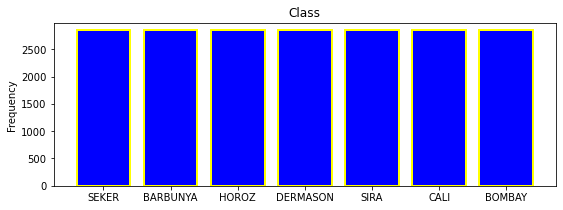

In [32]:
# Bar Chart to visualize the labels in the output variable in the SMOTE Balanced Dataset
y_train_1_balanced = lab_enc.inverse_transform(y_train_1)
y_train_1_balanced = pd.Index(y_train_1_balanced, name='Class')
var = y_train_1_balanced
varValue = var.value_counts()
plt.figure(figsize=(9, 3))
plt.bar(varValue.index, varValue,
        color= "blue", edgecolor="yellow",
        linewidth="2");plt.xticks(varValue.index,
                                  varValue.index.values)
plt.ylabel("Frequency")
plt.title('Class')
plt.show()

### Model Selection

As part of the assignment requirements, we were to select Logistic Regression, one method of Maximum Likelihood Estimation, and one that was free choice but relevant to the nature of the problem statement.

For the MLE model, we went with Naive Bayes, as it is the simplest expression of that sort of classification methodology. The other model was chosen to be XGBoost, due to its popularity and efficacy in modeling this kind of multivariate classification problem.

### Regularization

Models need to be regularized in order to make them be more representative of the general form of the problem statement. If not, they are prone to being biased towards the training set more so than the problem domain, a problem better known as overfitting.

Different models are regularized in different ways. XGBoost has the Dart boosting system, where a random tree is dropped every few iterations, whereas something like Logistic Regression relies on penalty terms (L2 by default).

In order to observe the difference made by regularization, we instantiate two versions of the models, one with the specific parameters used to allow for regularized results enabled, and the other with them disabled.

In [33]:
# Models with Regularization
case1_models_r = [
    ('LR Regularized', LogisticRegression()),
    ('NB Regularized ', GaussianNB()),
    ('XGB Regularized ', XGBClassifier(booster = 'dart'))
]

# Models without Regularization
case1_models = [
    ('Logistic Regression', LogisticRegression(penalty='none')),
    ('Naive Bayes', GaussianNB(var_smoothing = 0)),
    ('XGBoost', XGBClassifier())
]

We create a list of scoring metrics for analyzing the results of the cross-validation. In this case, we're using weighted precision, recall, and F1 scores, along with the accuracy rating.

In [34]:
# Empty lists to hold cross-validation results
results = []
names = []
dfs = []
results_r = []
names_r = []
dfs_r = []

# Evaluation Metrics
scoring = [
    'accuracy',
    'precision_weighted',
    'recall_weighted',
    'f1_weighted',
]

Now we run the cross validation for the models. This creates n folds of the training set, and iterates over them such that four folds are used to train and then predict the fifth fold. In this case, five folds are generated.

In [35]:
# 5-fold Cross Validation for the selected unregularized models
for name, model in case1_models:
        kfold = KFold(n_splits=5, shuffle=True, random_state=np.random.RandomState())
        cv_results = cross_validate(model, x_train_1, y_train_1, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        cvr_df = pd.DataFrame(cv_results)
        cvr_df['model'] = name
        dfs.append(cvr_df)

final = pd.concat(dfs, ignore_index=True)

[12:57:19] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:57:23] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:57:26] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:57:30] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

And then the same for the regularized models.

In [36]:
# 5-fold Cross Validation for the selected regularized models
for name, model in case1_models_r:
        kfold = KFold(n_splits=5, shuffle=True, random_state=np.random.RandomState())
        cv_results = cross_validate(model, x_train_1, y_train_1, cv=kfold, scoring=scoring)
        results_r.append(cv_results)
        names_r.append(name)
        cvr_df = pd.DataFrame(cv_results)
        cvr_df['model'] = name
        dfs_r.append(cvr_df)

final_r = pd.concat(dfs_r, ignore_index=True)

[12:57:40] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:57:49] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:57:58] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:58:07] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

Now we get a table with all the scoring metrics, along with the fit and scoring times.

In [37]:
# Tabular comparison of evaluation metrics
pd.concat([final, final_r], ignore_index=True).groupby('model').mean()

,fit_time,score_time,test_accuracy,test_precision_weighted,test_recall_weighted,test_f1_weighted
model,,,,,,
LR Regularized,0.294509,0.005599,0.781746,0.779902,0.781746,0.780182
Logistic Regression,0.227198,0.004801,0.781495,0.779681,0.781495,0.779930
NB Regularized,0.003201,0.008000,0.750251,0.750361,0.750251,0.747384
Naive Bayes,0.004000,0.006400,0.750452,0.750501,0.750452,0.747545
XGB Regularized,8.623481,0.127968,0.836095,0.836362,0.836095,0.835812
XGBoost,3.769277,0.028401,0.835745,0.835725,0.835745,0.835428


From above table we can inference following insights:
* `XGBoost Regularized` is having `highest accuracy`, `weighted precision`, `recall` and `f1 score` among the all other models.
* `XGBoost` is also having almost `similar accuracy`, `weighted precision`, `recall` and `f1 score` to the `XGB Regularized`.
* `XGBoost Regularized` having highest training time and prediction time hence `computationally costly` compared to other models.
* Overall `XGBoost` having good accuracy and manageble computational cost hence this would be the `best choice`.

**Model Hyperparameters Selection**

Since we have selected XGBoost as best performing model hence will do the model hyperparamter selection on XGBoost.In tree-based models, hyperparameters include things like the maximum depth of the tree, the number of trees to grow, the number of variables to consider when building each tree, the minimum number of samples on a leaf and the fraction of observations used to build a tree.

In [75]:
space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 180,
        'seed': 0
    }

In [76]:
def case1_objective(space):
    clf=XGBClassifier(
                    n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree']))
    
    evaluation = [( x_train_1, y_train_1), ( x_test_1, y_test_1)]
    
    clf.fit(x_train_1, y_train_1,
            eval_set=evaluation, eval_metric="auc",
            early_stopping_rounds=10,verbose=False)
    

    pred = clf.predict(x_test_1)
    accuracy = accuracy_score(y_test_1, pred>0.5)
    print ("SCORE:", accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK }

In [77]:
trials = Trials()

case1_best_hyperparams = fmin(fn = case1_objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)

SCORE:                                                                                                                                                                                 
0.060227690047741464                                                                                                                                                                   
SCORE:                                                                                                                                                                                 
0.059493206022769                                                                                                                                                                      
SCORE:                                                                                                                                                                                 
0.059493206022769                                                               

SCORE:                                                                                                                                                                                 
0.059493206022769                                                                                                                                                                      
SCORE:                                                                                                                                                                                 
0.060227690047741464                                                                                                                                                                   
SCORE:                                                                                                                                                                                 
0.06573632023503488                                                             

SCORE:                                                                                                                                                                                 
0.060227690047741464                                                                                                                                                                   
SCORE:                                                                                                                                                                                 
0.059493206022769                                                                                                                                                                      
SCORE:                                                                                                                                                                                 
0.060227690047741464                                                            

In [78]:
print("The best hyperparameters are : ","\n")
print(case1_best_hyperparams)

The best hyperparameters are :  

{'colsample_bytree': 0.6554825780803998, 'gamma': 3.3503347408503696, 'max_depth': 3.0, 'min_child_weight': 3.0, 'reg_alpha': 51.0, 'reg_lambda': 0.05979661610010578}


## Case-2:

The same steps as above, but for the 90-10 split dataset.

In [59]:
# Get train test dataset split
x_train_2, x_test_2, y_train_2, y_test_2 = get_train_test_data(imputed_feature_data, target, 0.9)

In [60]:
# Feature scaling
x_train_2, normalizer_model = scale_features(x_train_2)
x_test_2 = scale_features(x_test_2, normalizer_model=normalizer_model, is_fitted=True)

In [61]:
# Feature reduction using PCA
x_train_2, pca_model = pca_reduced_features(x_train_2, num_component=3)
x_test_2 = pca_reduced_features(x_test_2, num_component=3, pca_model=pca_model, is_fitted=True)

In [62]:
# Apply SMOTE for class imbalance
x_train_2, y_train_2 = apply_smote(x_train_2, y_train_2)

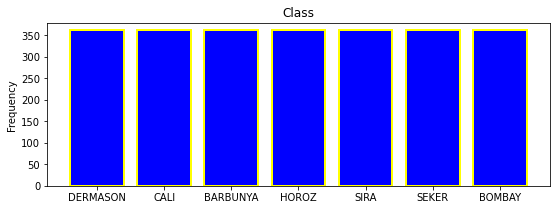

In [63]:
# Bar Chart to visualize the labels in the output variable in the SMOTE Balanced Dataset
y_train_2_balanced = lab_enc.inverse_transform(y_train_2)
y_train_2_balanced = pd.Index(y_train_2_balanced, name='Class')
var = y_train_2_balanced
varValue = var.value_counts()
plt.figure(figsize=(9, 3))
plt.bar(varValue.index, varValue,
        color= "blue", edgecolor="yellow",
        linewidth="2");plt.xticks(varValue.index,
                                  varValue.index.values)
plt.ylabel("Frequency")
plt.title('Class')
plt.show()

In [64]:
# Models with Regularization
case2_models_r = [
    ('LR Regularized', LogisticRegression()),
    ('NB Regularized ', GaussianNB()),
    ('XGB Regularized ', XGBClassifier(booster = 'dart'))
]

# Models without Regularization
case2_models = [
    ('Logistic Regression', LogisticRegression(penalty='none')),
    ('Naive Bayes', GaussianNB(var_smoothing = 0)),
    ('XGBoost', XGBClassifier())
]

In [65]:
# Empty lists to hold cross-validation results
results = []
names = []
dfs = []
results_r = []
names_r = []
dfs_r = []

# Evaluation Metrics
scoring = [
    'accuracy',
    'precision_weighted',
    'recall_weighted',
    'f1_weighted',
]

In [66]:
# 5-fold Cross Validation for the selected unregularized models
for name, model in case2_models:
        kfold = KFold(n_splits=5, shuffle=True, random_state=np.random.RandomState())
        cv_results = cross_validate(model, x_train_2, y_train_2, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        cvr_df = pd.DataFrame(cv_results)
        cvr_df['model'] = name
        dfs.append(cvr_df)

final = pd.concat(dfs, ignore_index=True)

[14:22:01] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:22:02] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:22:02] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:22:03] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

In [67]:
# 5-fold Cross Validation for the selected regularized models
for name, model in case2_models_r:
        kfold = KFold(n_splits=5, shuffle=True, random_state=np.random.RandomState())
        cv_results = cross_validate(model, x_train_2, y_train_2, cv=kfold, scoring=scoring)
        results_r.append(cv_results)
        names_r.append(name)
        cvr_df = pd.DataFrame(cv_results)
        cvr_df['model'] = name
        dfs_r.append(cvr_df)

final_r = pd.concat(dfs_r, ignore_index=True)

[14:22:05] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:22:08] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:22:11] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:22:14] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

In [68]:
# Tabular comparison of evaluation metrics
pd.concat([final, final_r], ignore_index=True).groupby('model').mean()

,fit_time,score_time,test_accuracy,test_precision_weighted,test_recall_weighted,test_f1_weighted
model,,,,,,
LR Regularized,0.056140,0.003037,0.802929,0.801042,0.802929,0.800311
Logistic Regression,0.078763,0.002392,0.799366,0.798897,0.799366,0.796910
NB Regularized,0.001600,0.003201,0.765736,0.763415,0.765736,0.761430
Naive Bayes,0.000800,0.003992,0.764148,0.763150,0.764148,0.759196
XGB Regularized,2.911848,0.068780,0.865055,0.867345,0.865055,0.865093
XGBoost,0.673769,0.008778,0.864661,0.866329,0.864661,0.864205


We see the impact of regularization is different for each kind of model. XGBoost gets a lot slower when regularizing, with little impact on the other scores. In general, the impact of regularization is minor for this situation, except that the regularized models tend to have slightly lower scores than the non-regularized ones.

This is reflective of the expected result of regularization, where the model is technically worse at representing the training dataset, but will be statistically more likely to predict the problem domain with a higher accuracy.

**Best Optimal Model for Given Data:**
    
From both the cases we can infer that XGBoost gives best performance.

**Model Hyperparameters Selection**

Since we have selected XGBoost as best performing model hence will do the model hyperparamter selection on XGBoost.In tree-based models, hyperparameters include things like the maximum depth of the tree, the number of trees to grow, the number of variables to consider when building each tree, the minimum number of samples on a leaf and the fraction of observations used to build a tree.

In [69]:
space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 180,
        'seed': 0
    }

In [70]:
def case2_objective(space):
    clf=XGBClassifier(
                    n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree']))
    
    evaluation = [( x_train_2, y_train_2), ( x_test_2, y_test_2)]
    
    clf.fit(x_train_2, y_train_2,
            eval_set=evaluation, eval_metric="auc",
            early_stopping_rounds=10,verbose=False)
    

    pred = clf.predict(x_test_2)
    accuracy = accuracy_score(y_test_2, pred>0.5)
    print ("SCORE:", accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK }

In [73]:
trials = Trials()

case2_best_hyperparams = fmin(fn = case2_objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)

SCORE:                                                                                                                                                                                 
0.05657142857142857                                                                                                                                                                    
SCORE:                                                                                                                                                                                 
0.05069387755102041                                                                                                                                                                    
SCORE:                                                                                                                                                                                 
0.05657142857142857                                                             

SCORE:                                                                                                                                                                                 
0.0953469387755102                                                                                                                                                                     
SCORE:                                                                                                                                                                                 
0.05069387755102041                                                                                                                                                                    
SCORE:                                                                                                                                                                                 
0.05657142857142857                                                             

SCORE:                                                                                                                                                                                 
0.05069387755102041                                                                                                                                                                    
SCORE:                                                                                                                                                                                 
0.05069387755102041                                                                                                                                                                    
SCORE:                                                                                                                                                                                 
0.05069387755102041                                                             

In [74]:
print("The best hyperparameters are : ","\n")
print(case2_best_hyperparams)

The best hyperparameters are :  

{'colsample_bytree': 0.8803912372379197, 'gamma': 6.623685486055965, 'max_depth': 18.0, 'min_child_weight': 6.0, 'reg_alpha': 179.0, 'reg_lambda': 0.6878317848835618}


# 5. Performance Evaluation

Since we have already selected from the previous step that our best algorithm to train the classification model will be `XGBoost` Hence will be using that model to do the evaluation on test data.

Also, we have already done the hyperparameters tunning for `XGBoost` in previous step for both the cases and hyperparameter are stored in case-1: `case1_best_hyperparams` and case-2 `case2_best_hyperparams` variables. We will be using these to fit the `XGBoost` model first on training data and then predict the target variable on test data and do the evaluation based on the actual target labels.

### Run Prediction on Case-1

We have divided the training and test data in `80-20 ratio` for case-1. All the fitted `model hyperparameters from cross validation` are stored in model pipeline `case1_models` for non regularized models and `case1_models_r` for regularized models. 

We will be using these model hyperparameters to first `fit the model` on training data i.e. `x_train_1 with truth labels y_train_1` and then `predict the target` variable for each observation in `x_test_1` and validate the predictions against `y_test_1` to calculate the model `evaluation metrices`.

In [83]:
case1_xgb_model = XGBClassifier(n_estimators =space['n_estimators'], max_depth = int(case1_best_hyperparams['max_depth']),
                      gamma = case1_best_hyperparams['gamma'], reg_alpha = int(case1_best_hyperparams['reg_alpha']), 
                      min_child_weight=int(case1_best_hyperparams['min_child_weight']), 
                      colsample_bytree=int(case1_best_hyperparams['colsample_bytree']))

pred = case1_xgb_model.fit(x_train_1, y_train_1)

y_pred = pred.predict(x_test_1)

[15:10:20] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


A Classification report is used to measure the quality of predictions from a classification algorithm. How many predictions are True and how many are False. More specifically, True Positives, False Positives, True negatives and False Negatives are used to predict the metrics of a classification report as shown below.

In [84]:
print(classification_report(y_test_1, y_pred, target_names=lab_enc.inverse_transform([0,1,2,3,4,5,6])))

              precision    recall  f1-score   support

    BARBUNYA       0.32      0.35      0.33       236
      BOMBAY       0.00      0.00      0.00       108
        CALI       0.18      0.12      0.14       337
    DERMASON       0.24      0.21      0.22       702
       HOROZ       0.14      0.19      0.16       383
       SEKER       0.02      0.02      0.02       423
        SIRA       0.63      0.65      0.64       534

    accuracy                           0.26      2723
   macro avg       0.22      0.22      0.22      2723
weighted avg       0.26      0.26      0.25      2723



The report shows the main classification metrics precision, recall and f1-score on a per-class basis. The metrics are calculated by using true and false positives, true and false negatives. Positive and negative in this case are generic names for the predicted classes.

**Precision-** Precision is the ability of a classifier not to label an instance positive that is actually negative for a given class. Here, we can see the `highest` precision is with class `SIRA` and `lowest` with class `BOMBAY`.

**Recall-** Recall is the ability of a classifier to find all positive instances for a given class. Here, we can see the `highest` precision is with class `SIRA` and `lowest` with class `BOMBAY`.

**F1 Score-** The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0. Overall F1 score for test data is `0.26` hence model is not performing well with test data. This might be due to the reason that model might have learnt the noise in training data. `BOMBAY` class is worst performing as `precision` and `recall` values are `zero` for both.

#### Identify Model Fitting (Underfitting / Overfitting / Best - Fit)

[15:18:22] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
>1, train: 0.500, test: 0.398
[15:18:22] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
>2, train: 0.573, test: 0.355
[15:18:22] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
>3, train: 0.602, test: 0.280
[15:18:22] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was chang

>29, train: 0.776, test: 0.274
[15:18:36] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
>30, train: 0.775, test: 0.273
[15:18:36] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
>31, train: 0.775, test: 0.272
[15:18:37] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
>32, train: 0.776, test: 0.263
[15:18:38] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the ob

>58, train: 0.784, test: 0.255
[15:19:12] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
>59, train: 0.784, test: 0.256
[15:19:13] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
>60, train: 0.784, test: 0.256
[15:19:15] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
>61, train: 0.783, test: 0.257
[15:19:17] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the ob

>87, train: 0.787, test: 0.255
[15:20:10] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
>88, train: 0.788, test: 0.255
[15:20:12] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
>89, train: 0.787, test: 0.255
[15:20:14] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
>90, train: 0.788, test: 0.256
[15:20:17] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the ob

>116, train: 0.789, test: 0.255
[15:21:31] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
>117, train: 0.789, test: 0.255
[15:21:34] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
>118, train: 0.789, test: 0.255
[15:21:37] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
>119, train: 0.789, test: 0.255
[15:21:41] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with th

>145, train: 0.789, test: 0.256
[15:23:26] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
>146, train: 0.789, test: 0.256
[15:23:30] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
>147, train: 0.789, test: 0.256
[15:23:35] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
>148, train: 0.789, test: 0.256
[15:23:39] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with th

>174, train: 0.789, test: 0.256
[15:25:40] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
>175, train: 0.789, test: 0.256
[15:25:45] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
>176, train: 0.789, test: 0.256
[15:25:50] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
>177, train: 0.789, test: 0.256
[15:25:55] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with th

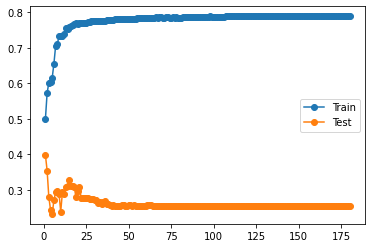

In [88]:
train_scores, test_scores = list(), list()

n_estimator_values = [v for v in range(1, 181)]

for n_estimator in n_estimator_values:
    model = XGBClassifier(n_estimators =n_estimator, max_depth = int(case1_best_hyperparams['max_depth']),
                      gamma = case1_best_hyperparams['gamma'], reg_alpha = int(case1_best_hyperparams['reg_alpha']), 
                      min_child_weight=int(case1_best_hyperparams['min_child_weight']), 
                      colsample_bytree=int(case1_best_hyperparams['colsample_bytree']))
    
    # fit model on the training dataset
    model.fit(x_train_1, y_train_1)
    
    # evaluate on the train dataset
    train_yhat = model.predict(x_train_1)
    train_acc = accuracy_score(y_train_1, train_yhat)
    train_scores.append(train_acc)
    
    # evaluate on the test dataset
    test_yhat = model.predict(x_test_1)
    test_acc = accuracy_score(y_test_1, test_yhat)
    test_scores.append(test_acc)
    
    # summarize progress
    print('>%d, train: %.3f, test: %.3f' % (n_estimator, train_acc, test_acc))

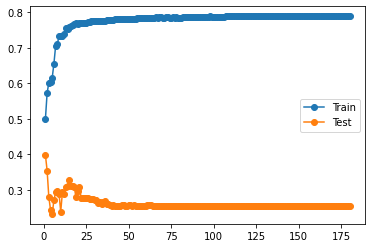

In [89]:
# plot of train and test scores vs number of neighbors
plt.plot(n_estimator_values, train_scores, '-o', label='Train')
plt.plot(n_estimator_values, test_scores, '-o', label='Test')
plt.legend()
plt.show()

From the above plot we can see both `training` and `testing` accuracy converges but still training accuracy is very high compared to the testing accuracy hence we can say that model has `overfitted` due to the learning of noise in training data.

### Run Prediction on Case-2

We have divided the training and test data in `10-90 ratio` for case-1. All the fitted `model hyperparameters from cross validation` are stored in model pipeline `case2_models` for non regularized models and `case2_models_r` for regularized models. 

We will be using these model hyperparameters to first `fit the model` on training data i.e. `x_train_2 with truth labels y_train_2` and then `predict the target` variable for each observation in `x_test_2` and validate the predictions against `y_test_2` to calculate the model `evaluation metrices`.

In [80]:
model = XGBClassifier(n_estimators =space['n_estimators'], max_depth = int(case2_best_hyperparams['max_depth']),
                      gamma = case2_best_hyperparams['gamma'], reg_alpha = int(case2_best_hyperparams['reg_alpha']), 
                      min_child_weight=int(case2_best_hyperparams['min_child_weight']), 
                      colsample_bytree=int(case2_best_hyperparams['colsample_bytree']))

pred = model.fit(x_train_2, y_train_2)

y_pred = pred.predict(x_test_2)

print(classification_report(y_test_2, y_pred, target_names=lab_enc.inverse_transform([0,1,2,3,4,5,6])))

[14:48:39] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

    BARBUNYA       0.22      0.98      0.37      1187
      BOMBAY       0.00      0.00      0.00       467
        CALI       0.00      0.00      0.00      1462
    DERMASON       0.44      0.31      0.36      3185
       HOROZ       0.00      0.00      0.00      1745
       SEKER       0.47      0.92      0.62      1816
        SIRA       0.00      0.00      0.00      2388

    accuracy                           0.31     12250
   macro avg       0.16      0.32      0.19     12250
weighted avg       0.20      0.31      0.22     12250



**Precision-** Precision is the ability of a classifier not to label an instance positive that is actually negative for a given class. Here, we can see the highest precision is with class `SEKER` and lowest with class `BOMBAY`, `CALI`, `SIRA` and `HOROZ`.

**Recall-** Recall is the ability of a classifier to find all positive instances for a given class. Here, we can see the highest precision is with class `SEKER` and lowest with class `BOMBAY`, `CALI`, `SIRA` and `HOROZ`.

**F1 Score-** The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0. Overall F1 score for test data is 0.31 hence model is not performing well with test data. This might be due to the reason that model might have learnt the noise in training data. `BOMBAY`, `CALI`, `SIRA` and `HOROZ` classes are worst performing as precision and recall values are zero for both.


#### Identify Model Fitting (Underfitting / Overfitting / Best - Fit)

In [90]:
train_scores, test_scores = list(), list()

n_estimator_values = [v for v in range(1, 131)]

for n_estimator in n_estimator_values:
    model = XGBClassifier(n_estimators =n_estimator, max_depth = int(case2_best_hyperparams['max_depth']),
                      gamma = case2_best_hyperparams['gamma'], reg_alpha = int(case2_best_hyperparams['reg_alpha']), 
                      min_child_weight=int(case2_best_hyperparams['min_child_weight']), 
                      colsample_bytree=int(case2_best_hyperparams['colsample_bytree']))
    
    # fit model on the training dataset
    model.fit(x_train_2, y_train_2)
    
    # evaluate on the train dataset
    train_yhat = model.predict(x_train_2)
    train_acc = accuracy_score(y_train_2, train_yhat)
    train_scores.append(train_acc)
    
    # evaluate on the test dataset
    test_yhat = model.predict(x_test_2)
    test_acc = accuracy_score(y_test_2, test_yhat)
    test_scores.append(test_acc)
    
    # summarize progress
    print('>%d, train: %.3f, test: %.3f' % (n_estimator, train_acc, test_acc))

[15:35:47] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
>1, train: 0.376, test: 0.234
[15:35:47] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
>2, train: 0.376, test: 0.234
[15:35:47] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
>3, train: 0.376, test: 0.234
[15:35:47] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was chang

[15:35:49] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
>31, train: 0.431, test: 0.312
[15:35:49] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
>32, train: 0.431, test: 0.312
[15:35:49] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
>33, train: 0.431, test: 0.312
[15:35:49] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was ch

>59, train: 0.431, test: 0.312
[15:35:53] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
>60, train: 0.431, test: 0.312
[15:35:53] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
>61, train: 0.431, test: 0.312
[15:35:54] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
>62, train: 0.431, test: 0.312
[15:35:54] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the ob

>88, train: 0.431, test: 0.312
[15:35:59] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
>89, train: 0.431, test: 0.312
[15:35:59] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
>90, train: 0.431, test: 0.312
[15:36:00] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
>91, train: 0.431, test: 0.312
[15:36:00] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the ob

>117, train: 0.431, test: 0.312
[15:36:08] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
>118, train: 0.431, test: 0.312
[15:36:08] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
>119, train: 0.431, test: 0.312
[15:36:08] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
>120, train: 0.431, test: 0.312
[15:36:09] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with th

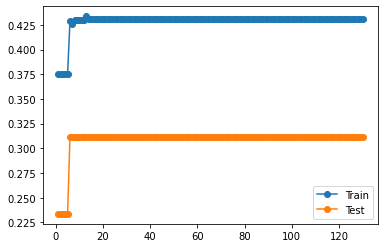

In [91]:
# plot of train and test scores vs number of neighbors
plt.plot(n_estimator_values, train_scores, '-o', label='Train')
plt.plot(n_estimator_values, test_scores, '-o', label='Test')
plt.legend()
plt.show()

From the above plot we can see both `training` and `testing` accuracy `converges` but still `training` and `testing` accuracy is very low hence we can say that model has `underfitted` on both training and testing data. This is due to less example available to learn for the model.